## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Loading and Initial Inspection

In [2]:
df = pd.read_csv('../data/global_economy_indicators.csv')
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [4]:
df.shape

(10512, 26)

#### Datatypes of Columns

In [3]:
df.dtypes

 CountryID                                                                                      int64
 Country                                                                                       object
 Year                                                                                           int64
 AMA exchange rate                                                                            float64
 IMF based exchange rate                                                                      float64
 Population                                                                                     int64
 Currency                                                                                      object
 Per capita GNI                                                                                 int64
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           float64
 Changes in inventories                                                           

The column names are descriptive, however as a good practice, it is better to remove spaces and standardize case.

#### Information of Dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

#### Number of Unique Values

In [6]:
df.nunique()

 CountryID                                                                                      220
 Country                                                                                        220
 Year                                                                                            52
 AMA exchange rate                                                                             6414
 IMF based exchange rate                                                                       6251
 Population                                                                                   10498
 Currency                                                                                       153
 Per capita GNI                                                                                6479
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           10333
 Changes in inventories                                                                        8648


#### Count of Null Values

In [7]:
df.isna().sum()

 CountryID                                                                                       0
 Country                                                                                         0
 Year                                                                                            0
 AMA exchange rate                                                                               0
 IMF based exchange rate                                                                         0
 Population                                                                                      0
 Currency                                                                                        0
 Per capita GNI                                                                                  0
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
 Changes in inventories                                                                       1841
 Construct

In [18]:
len(df)

10512

In [20]:
percent = pd.DataFrame(index=df.columns)
percent['null_count'] = df.isna().sum()
percent['percent_null'] = percent['null_count'] / len(df)
percent

,null_count,percent_null
CountryID,0,0.000000
Country,0,0.000000
Year,0,0.000000
AMA exchange rate,0,0.000000
IMF based exchange rate,0,0.000000
Population,0,0.000000
Currency,0,0.000000
Per capita GNI,0,0.000000
"Agriculture, hunting, forestry, fishing (ISIC A-B)",121,0.011511
Changes in inventories,1841,0.175133


The percentage of null values is not significant in majority of columns.

#### Statistics of Data

In [21]:
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.039100e+04,8.671000e+03,1.051200e+04,1.049100e+04,...,1.046000e+04,1.047000e+04,1.046900e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.046300e+04,1.046300e+04,1.051200e+04,1.051200e+04
mean,431.116629,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,251.169090,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.034349e+10,8.932353e+09,4.985596e+10,1.748857e+11,...,6.038454e+11,1.804351e+11,1.723910e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.187359e+10,1.391727e+11,9.942144e+11,9.845997e+11
min,4.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,212.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.304522e+08,4.673545e+05,6.815523e+07,4.026725e+08,...,9.389897e+08,5.891469e+08,1.109497e+08,1.857038e+08,3.555891e+08,1.355670e+09,8.998828e+07,2.078732e+08,1.410772e+09,1.439217e+09
50%,430.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.313674e+08,6.829635e+07,3.717701e+08,2.407906e+09,...,5.154424e+09,2.891919e+09,9.113543e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.441500e+08,1.056493e+09,7.887233e+09,8.070572e+09
75%,643.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.023326e+09,6.910750e+08,2.815730e+09,1.542492e+10,...,3.008905e+10,1.602312e+10,7.405364e+09,1.251358e+10,1.442130e+10,4.819144e+10,3.975893e+09,6.707456e+09,5.005789e+10,5.172596e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


## Cleaning

#### Renaming Columns

In [41]:
"ABC ".split(" (")[0].strip(),"ABC ()".split(" (")[0]

('ABC', 'ABC')

In [40]:
# res = []
# for col in df.columns:
#     # Remove Additional Information within braces
#     tmp = col.split("(")[0].strip()
#     # Convert to Lower
#     tmp = tmp.lower()
#     # Convert spaces to underscores and remove commas
#     tmp = tmp.replace(" ", "_")
#     tmp = tmp.replace(",","")
#     res.append(tmp)
# df.columns = res

df.columns = [col.split("(")[0].strip().lower().replace(" ", "_").replace(",","").strip("_") for col in df.columns]

## Detailed EDA

#### Number of Countries

In [42]:
n_countries = df.country.nunique()
n_countries

220

#### Number of Countries every year

In [50]:
country_count = df.year.value_counts()
country_count = pd.DataFrame(country_count).reset_index()

In [57]:
country_count.sort_values(by='year')

,year,count
51,1970,187
44,1971,187
34,1972,187
35,1973,187
36,1974,187
37,1975,187
38,1976,187
39,1977,187
40,1978,187
41,1979,187


In [55]:
country_count['year']

0     1990
1     2008
2     2009
3     2010
4     2012
5     2011
6     2005
7     2006
8     2007
9     2021
10    2013
11    2015
12    2016
13    2017
14    2018
15    2019
16    2014
17    2020
18    1991
19    1992
20    1993
21    2002
22    2000
23    2001
24    2003
25    2004
26    1998
27    1999
28    1996
29    1997
30    1995
31    1994
32    1989
33    1980
34    1972
35    1973
36    1974
37    1975
38    1976
39    1977
40    1978
41    1979
42    1982
43    1981
44    1971
45    1983
46    1984
47    1985
48    1986
49    1987
50    1988
51    1970
Name: year, dtype: int64

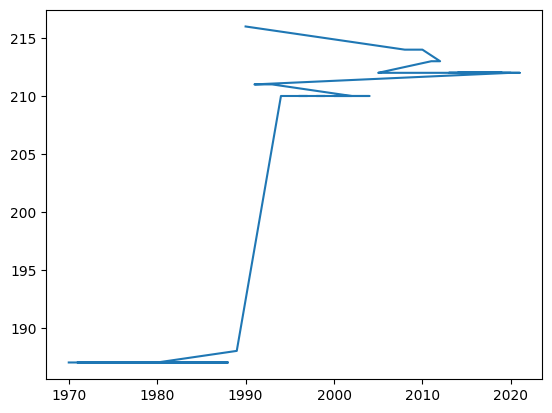

In [56]:
plt.plot(country_count['year'], country_count['count'])

#### Population by Year

In [62]:
population_df = df.groupby(by='year').sum().reset_index()

In [61]:
population_df.head()

,countryid,country,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,construction,...,household_consumption_expenditure,imports_of_goods_and_services,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product
year,,,,,,,,,,,,,,,,,,,,,
1970,80345,Afghanistan Albania Algeria Andorra Angol...,6483.604571,6648.575252,3675645296,Afghani Lek Algerian Dinar Euro Kwanza E...,195858,3.098038e+11,4.655306e+10,2.146587e+11,...,1.953929e+12,3.841562e+11,8.512958e+11,1.012736e+12,1.036070e+12,3.289897e+12,2.572724e+11,4.608816e+11,3.403031e+12,3.411565e+12
1971,80345,Afghanistan Albania Algeria Andorra Angol...,6489.040049,6669.402297,3749955242,Afghani Lek Algerian Dinar Euro Kwanza E...,216964,3.257875e+11,3.459196e+10,2.411731e+11,...,2.147573e+12,4.273286e+11,9.204942e+11,1.100591e+12,1.159565e+12,3.618333e+12,2.836873e+11,5.068313e+11,3.757570e+12,3.753968e+12
1972,80345,Afghanistan Albania Algeria Andorra Angol...,6132.753915,6679.335293,3824140476,Afghani Lek Algerian Dinar Euro Kwanza E...,250685,3.628836e+11,3.646151e+10,2.841193e+11,...,2.465641e+12,5.012830e+11,1.061061e+12,1.268444e+12,1.340293e+12,4.174868e+12,3.295339e+11,5.867935e+11,4.325690e+12,4.325758e+12
1973,80345,Afghanistan Albania Algeria Andorra Angol...,5614.949960,6316.170121,3899150761,Afghani Lek Algerian Dinar Euro Kwanza E...,313673,4.659713e+11,7.067026e+10,3.462233e+11,...,2.953545e+12,6.805356e+11,1.295850e+12,1.560658e+12,1.604144e+12,5.083962e+12,3.923340e+11,7.082031e+11,5.263556e+12,5.265354e+12
1974,80345,Afghanistan Albania Algeria Andorra Angol...,5917.008499,6382.963568,3973861696,Afghani Lek Algerian Dinar Euro Kwanza E...,398318,4.971064e+11,1.165144e+11,3.842758e+11,...,3.329197e+12,9.542081e+11,1.437719e+12,1.817321e+12,1.806616e+12,5.751395e+12,4.406966e+11,8.070997e+11,5.960875e+12,5.963784e+12


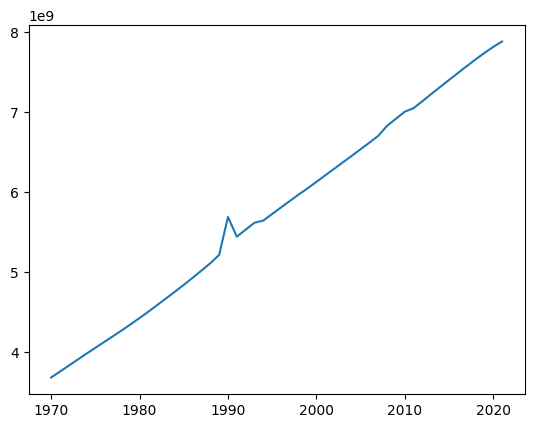

In [63]:
plt.plot(population_df['year'], population_df['population'])

#### GDP of India over years

In [70]:
df['country'] = df.country.str.strip()
df.country.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

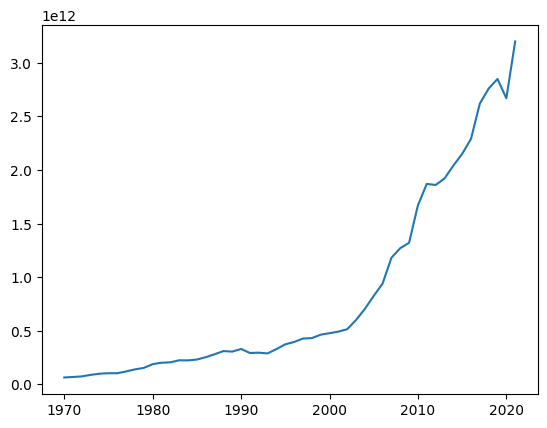

In [69]:
temp = df[df.country == ' India '].groupby(by='year').sum().reset_index()
plt.plot(temp['year'], temp['gross_domestic_product'])